In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-dataset/brain_stroke.csv


# Opening the data

In [91]:
df=pd.read_csv("/kaggle/input/brain-stroke-dataset/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Exploring the data

In [92]:
df.shape

(4981, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [94]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [95]:
low_information_cols = [] 
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()
    nunique_ratio = df[col].nunique() / df[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

stroke: 95.02% одинаковых значений


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Removing an unwanted column

In [97]:
df.drop(['work_type'], axis=1, inplace=True)

# Converting to binary system

In [98]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})
df['ever_married'] = df['ever_married'].map({'Yes':1, 'No':0})
df['Residence_type'] = df['Residence_type'].map({'Urban':1, 'Rural':0})
df['smoking_status'] = df['smoking_status'].map({'smokes':1, 'formerly smoked':1, 'never smoked':0, 'Unknown':0})


# Visualize Feature Correlation

In [99]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

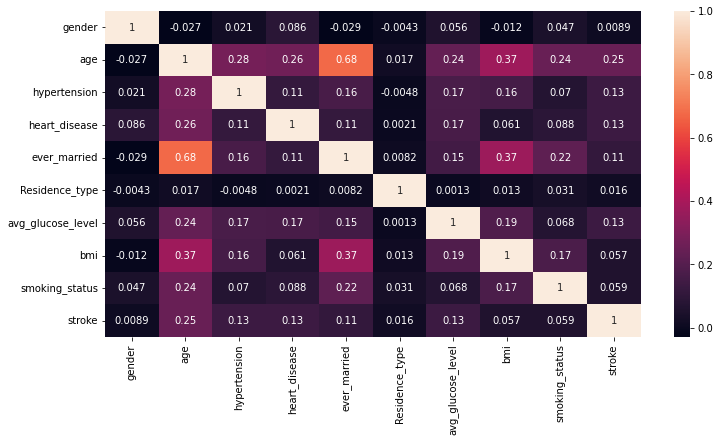

In [100]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

# Train data

In [101]:

X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [102]:
from sklearn import linear_model 
from sklearn import metrics 
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing 

In [103]:
log_reg = linear_model.LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X, y)

LogisticRegression(max_iter=500, random_state=42)

In [104]:
df['heart_disease'].value_counts()

0    4706
1     275
Name: heart_disease, dtype: int64

In [105]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,0,105.92,32.5,0,1
2,0,49.0,0,0,1,1,171.23,34.4,1,1
3,0,79.0,1,0,1,0,174.12,24.0,0,1
4,1,81.0,0,0,1,1,186.21,29.0,1,1


In [106]:
x_new = [[1, 65, 1, 1, 1, 1, 223.56, 44.4, 1]]
y_new_proba_predict = log_reg.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

Predicted probabilities: [[0.76 0.24]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [108]:
y_new_predict = log_reg.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [0]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# I'm new, this is my first model and it seems to work. Please point out my mistakes and shortcomings. I'll be very thankful